In [1]:
import pandas as pd
import json



In [2]:
# File paths for each dataset
business_file_path = '/Users/vijaykumardevalla/Documents/Unstructured Data Analytics/Final Project/yelp_academic_dataset_business.csv'
review_file_path = '/Users/vijaykumardevalla/Documents/Unstructured Data Analytics/Final Project/yelp_academic_dataset_review.csv'




In [3]:

business_df = pd.read_csv(business_file_path)
review_df = pd.read_csv(review_file_path)


/var/folders/cd/xth5td056xg6_t8pxj8ngh980000gn/T/ipykernel_88819/1973249887.py:1: DtypeWarning: Columns (26,56) have mixed types. Specify dtype option on import or set low_memory=False.
  business_df = pd.read_csv(business_file_path)


In [4]:
business_df.columns

Index(['hours.Monday', 'hours.Sunday', 'attributes.RestaurantsAttire',
       'postal_code', 'attributes.BestNights', 'hours.Wednesday',
       'attributes.Caters', 'attributes.Music',
       'attributes.WheelchairAccessible', 'attributes.RestaurantsReservations',
       'stars', 'attributes.HappyHour', 'attributes.Smoking',
       'attributes.NoiseLevel', 'attributes.CoatCheck',
       'attributes.BikeParking', 'is_open', 'longitude', 'city',
       'attributes.RestaurantsPriceRange2', 'hours.Tuesday',
       'attributes.HasTV', 'attributes.HairSpecializesIn',
       'attributes.ByAppointmentOnly', 'hours.Saturday',
       'attributes.DogsAllowed', 'attributes.Open24Hours', 'attributes.WiFi',
       'attributes.DriveThru', 'attributes.RestaurantsTableService',
       'attributes.OutdoorSeating', 'attributes.GoodForDancing', 'business_id',
       'attributes.BusinessParking', 'attributes.BYOBCorkage', 'address',
       'attributes.AgesAllowed', 'name', 'attributes.RestaurantsTakeOut',


In [5]:
review_df.head()

,business_id,funny,stars,cool,user_id,useful,text,date,review_id
0,XQfwVwDr-v0ZS3_CbbE5Xw,0,3.0,0,mh_-eMZ6K5RLWhZyISBhwA,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,KU_O5udG6zpxOg-VcAEodg
1,7ATYjTIgM3jUlt4UM3IypQ,0,5.0,1,OyoGAe7OKpv6SyGZT5g77Q,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,BiTunyQ73aT9WBnpR9DZGw
2,YjUWPpI6HXG530lwP-fb2A,0,3.0,0,8g_iMtfSiwikVnbP2etR0A,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,saUsX_uimxRlCVr67Z4Jig
3,kxX2SOes4o-D3ZQBkiMRfA,0,5.0,1,_7bHUi9Uuf5__HHc_Q8guQ,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,AqPFMleE6RsU23_auESxiA
4,e4Vwtrqf-wpJfwesgvdgxQ,0,4.0,1,bcjbaE6dDog4jkNY91ncLQ,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,Sx8TMOWLNuJBWer-0pcmoA


In [6]:
# Adjusting relevant columns from the business dataframe to include in the merge
business_relevant_columns = ['business_id', 'name', 'stars', 'review_count', 'categories', 'postal_code', 'state','is_open']

# Ensuring the review dataframe includes necessary columns for the analysis
review_relevant_columns = ['business_id', 'text', 'date', 'stars']  # 'stars' here represents the review rating

# Select relevant columns from both dataframes before merging
business_df_relevant = business_df[business_relevant_columns]
review_df_relevant = review_df[review_relevant_columns]

# Merging the dataframes on 'business_id' to include review texts and business attributes
merged_df = pd.merge(review_df_relevant, business_df_relevant, on='business_id', how='inner')

print("Merged dataset shape:", merged_df.shape)

merged_df

Merged dataset shape: (6990280, 11)


,business_id,text,date,stars_x,name,stars_y,review_count,categories,postal_code,state,is_open
0,XQfwVwDr-v0ZS3_CbbE5Xw,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,3.0,Turning Point of North Wales,3.0,169,"Restaurants, Breakfast & Brunch, Food, Juice B...",19454,PA,1
1,XQfwVwDr-v0ZS3_CbbE5Xw,This is the second time we tried turning point...,2017-05-13 17:06:55,2.0,Turning Point of North Wales,3.0,169,"Restaurants, Breakfast & Brunch, Food, Juice B...",19454,PA,1
2,XQfwVwDr-v0ZS3_CbbE5Xw,The place is cute and the staff was very frien...,2017-08-08 00:58:18,4.0,Turning Point of North Wales,3.0,169,"Restaurants, Breakfast & Brunch, Food, Juice B...",19454,PA,1
3,XQfwVwDr-v0ZS3_CbbE5Xw,We came on a Saturday morning after waiting a ...,2017-11-19 02:20:23,3.0,Turning Point of North Wales,3.0,169,"Restaurants, Breakfast & Brunch, Food, Juice B...",19454,PA,1
4,XQfwVwDr-v0ZS3_CbbE5Xw,"Mediocre at best. The decor is very nice, and ...",2017-09-09 17:49:47,2.0,Turning Point of North Wales,3.0,169,"Restaurants, Breakfast & Brunch, Food, Juice B...",19454,PA,1
...,...,...,...,...,...,...,...,...,...,...,...
6990275,vI4vyi1dfG93oAiSRFDymA,Ridiculous wait times. I showed up right on ti...,2018-06-05 14:25:32,1.0,Aesthetic Dermatology Associates,2.5,5,"Medical Spas, Doctors, Laser Hair Removal, Der...",19301,PA,1
6990276,vI4vyi1dfG93oAiSRFDymA,Love this office. All the staff us super kind ...,2020-02-17 01:53:23,5.0,Aesthetic Dermatology Associates,2.5,5,"Medical Spas, Doctors, Laser Hair Removal, Der...",19301,PA,1
6990277,vI4vyi1dfG93oAiSRFDymA,It was a HUGE mistake to give this place a try...,2021-09-22 16:51:46,1.0,Aesthetic Dermatology Associates,2.5,5,"Medical Spas, Doctors, Laser Hair Removal, Der...",19301,PA,1
6990278,vI4vyi1dfG93oAiSRFDymA,Friendly staff but the praise ends there. Gett...,2021-03-09 19:21:44,1.0,Aesthetic Dermatology Associates,2.5,5,"Medical Spas, Doctors, Laser Hair Removal, Der...",19301,PA,1


In [7]:
!pip install matplotlib seaborn wordcloud


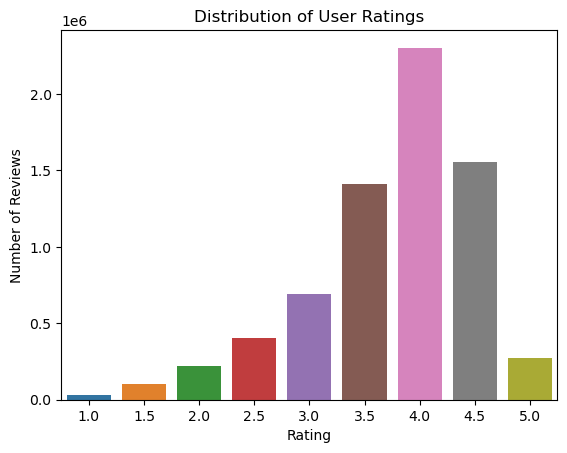

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pandas as pd

# Assuming 'df' is your DataFrame with columns 'text', 'stars_y', 'postal_code', and 'is_open'

# Distribution of Ratings
sns.countplot(x='stars_y', data=merged_df)
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()







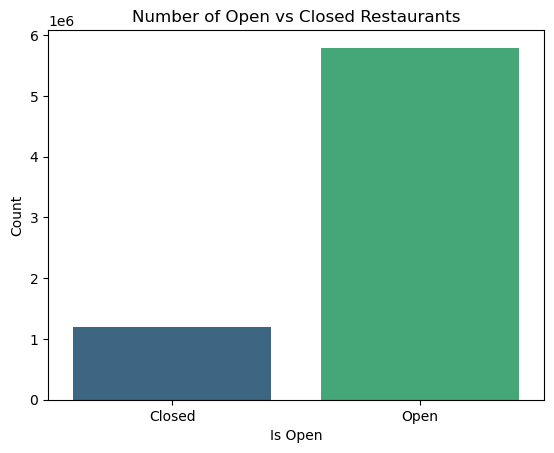

In [9]:
# Open vs Closed Restaurants
sns.countplot(x='is_open', data=merged_df, palette='viridis')
plt.title('Number of Open vs Closed Restaurants')
plt.xlabel('Is Open')
plt.ylabel('Count')
plt.xticks([0, 1], ['Closed', 'Open'])
plt.show()

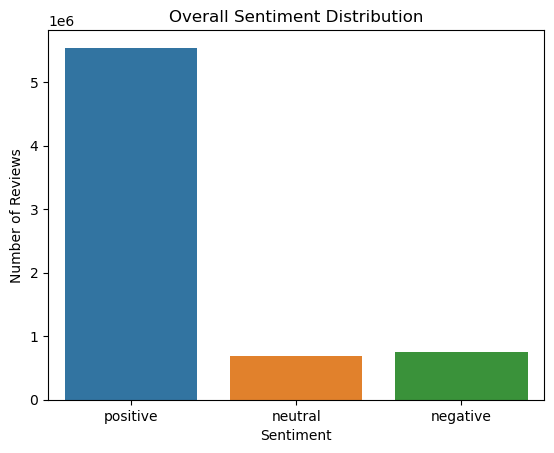

In [11]:
merged_df['sentiment'] = merged_df['stars_y'].apply(lambda x: 'positive' if x > 3 else ('neutral' if x == 3 else 'negative'))
sns.countplot(x='sentiment', data=merged_df, order=['positive', 'neutral', 'negative'])
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


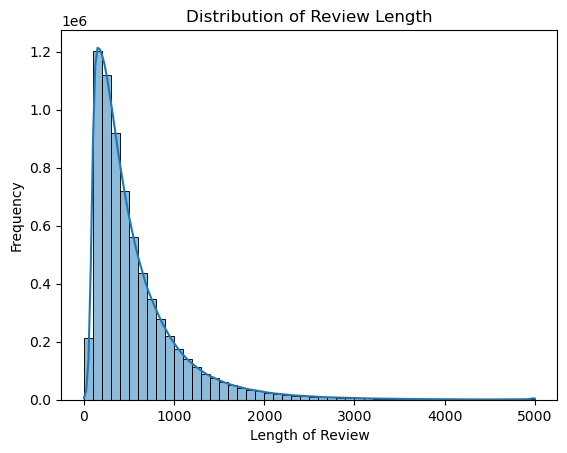

In [12]:
merged_df['review_length'] = merged_df['text'].apply(len)
sns.histplot(merged_df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Length')
plt.xlabel('Length of Review')
plt.ylabel('Frequency')
plt.show()


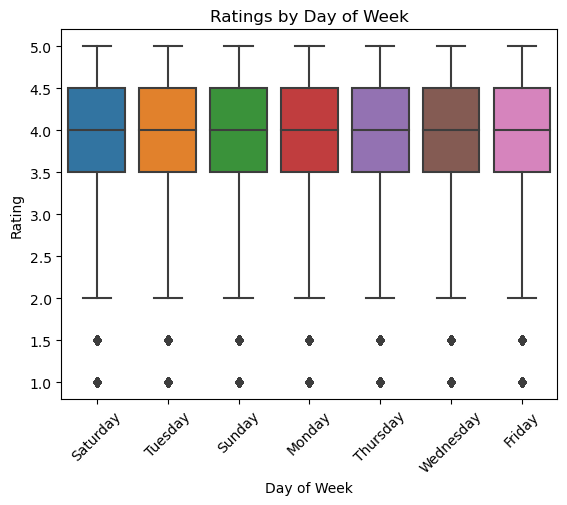

In [14]:
# Convert the date string to datetime
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Extract the day of the week
merged_df['day_of_week'] = merged_df['date'].dt.day_name()

# Create the boxplot
sns.boxplot(x='day_of_week', y='stars_y', data=merged_df)

# Set the title and labels
plt.title('Ratings by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Rating')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

It appears that the median ratings are fairly consistent across the days of the week, with no significant fluctuations. The ranges and IQRs are also quite similar, which suggests that the ratings behave similarly regardless of the day of the week. There are some outliers, which are ratings that are much lower than the typical range.